In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [12]:
from glob import glob
classes = {
}
df['class'][df['classID'] == 1].unique()[0]
classes[df['class'][df['classID'] == 1].unique()[0]]

'car_horn'

In [17]:
for i in range(1,11):
    classes[df['class'][df['classID'] == i-1].unique()[0]]=glob(f'UrbanSound8K/UrbanSound8K/audio/fold{i}/*.wav')
classes

{'car_horn': ['UrbanSound8K/UrbanSound8K/audio/fold2\\100652-3-0-0.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\100652-3-0-1.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\100652-3-0-2.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\100652-3-0-3.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102104-3-0-0.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102858-5-0-0.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102858-5-0-1.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-0.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-1.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-10.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-11.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-12.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-13.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-14.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-15.wav',
  'UrbanSound8K/UrbanSound8K/audio/fold2\\102871-8-0-2.wav',
  'Urb

In [18]:
def getList(dict):
    return [*dict]
getList(classes.keys())

['car_horn',
 'air_conditioner',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [19]:
import os
try:
    os.mkdir('data/')
    for i in getList(classes.keys()):
        os.mkdir(f'data/{i}')
except:
    print('Dosta zaten var')

In [23]:
classes['air_conditioner'][0]

'UrbanSound8K/UrbanSound8K/audio/fold1\\101415-3-0-2.wav'

In [24]:
path = 'UrbanSound8K/UrbanSound8K/audio/fold1\\101415-3-0-2.wav'

In [26]:
import librosa
def create_spec(y):
    spec=librosa.feature.melspectrogram(y=y)
    spec_conv=librosa.amplitude_to_db(spec,ref=np.max)
    return spec_conv
y, sr = librosa.load(path)

create_spec(y).shape

(128, 173)

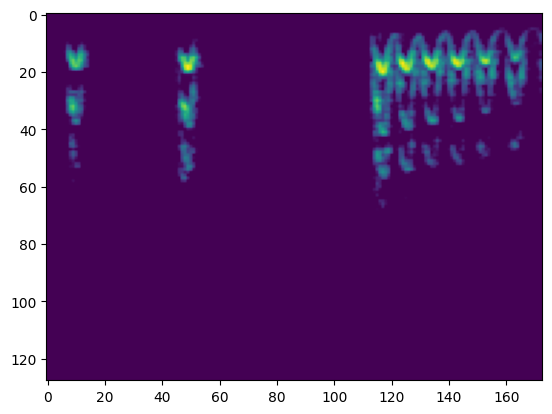

In [27]:
y, sr = librosa.load(path)

plt.imshow(create_spec(y))

In [28]:
import uuid

def saver():
    for key in getList(classes.keys()):
        for i in range(len(classes[key])):
            sample = classes[key][i]
            y, sr = librosa.load(sample)
            spec = create_spec(y)

            plt.imsave(f'data/{key}/{str(uuid.uuid4())}.jpg',spec)
saver()
